<a href="https://colab.research.google.com/github/Drishya24-lab/nvidia-stock-price-prediction-lstm/blob/main/TSA_on_Nvidia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
zipfile_path=('/content/drive/MyDrive/archive (4).zip')
with zipfile.ZipFile(zipfile_path,'r') as zip_ref:
  zip_ref.extractall('/content/drive/MyDrive')

import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/nvidia_stock_prices.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Show first 2 rows and basic information about the dataset
print(data.head(2))
print('\n')
data.info()
print('\n')
print(data.dtypes)
print('\n')
print(data.isnull().sum())

         Date      Open      High       Low     Close     Volume
0  2004-01-02  0.196417  0.199083  0.192333  0.192333  436416000
1  2004-01-05  0.195250  0.199917  0.193500  0.198583  575292000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5033 non-null   object 
 1   Open    5033 non-null   float64
 2   High    5033 non-null   float64
 3   Low     5033 non-null   float64
 4   Close   5033 non-null   float64
 5   Volume  5033 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 236.0+ KB


Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [3]:

#Convert Date to DateTime
data['Date']=pd.to_datetime(data['Date'])

#Set Date as Index
data.set_index('Date',inplace=True)

close_data=data[['Close']]




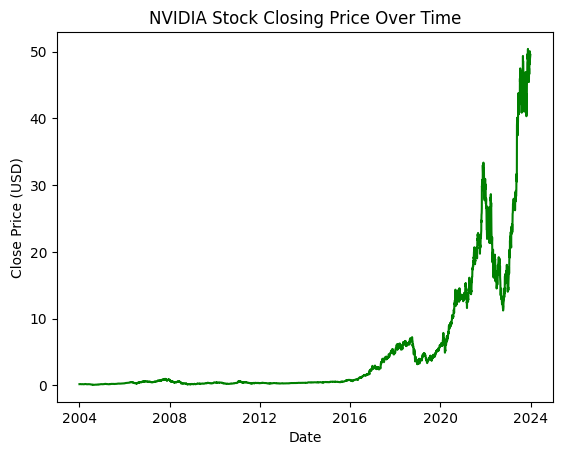

In [4]:
#Plot the Closing Price

import matplotlib.pyplot as plt

plt.plot(close_data,color='green')
plt.title('NVIDIA Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

In [5]:
#Data Scaling

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(close_data)

In [6]:
#Split data into training and testing datasets

training_data_len=int(len(scaled_data)*0.8)
train_data=scaled_data[:training_data_len]
test_data=scaled_data[training_data_len:]


In [7]:
#Prepare Data for LSTM Model

import numpy as np

look_back=60

X_train=[]
y_train=[]

for i in range(look_back,len(train_data)):
  X_train.append(train_data[i-look_back:i,0])
  y_train.append(train_data[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Combine the last 60 days of training data with the test data
test_data_full = np.concatenate((train_data[-look_back:], test_data), axis=0)
X_test, y_test = [], []

for i in range(look_back, len(test_data_full)):
    X_test.append(test_data_full[i - look_back:i, 0])
    y_test.append(test_data_full[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)


X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [9]:
# Build and Train the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 2.8344e-04
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 2.1779e-05
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 2.1735e-05
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - loss: 1.8971e-05
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 18s 64ms/step - loss: 1.8630e-05
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 1.6338e-05
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 1.7598e-05
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 1.7139e-05
Epoch 9/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 1.4665e-05
Epoch 10/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 1.4963e-05
Epoch 11/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 1.4171e-05
Epoch 12/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 1.6321e-05
Epoch 13/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 1.7432e-05
Epoch 14/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step

In [10]:
# Make predictions using the test set
predictions = model.predict(X_test)

#Reverse scaling for predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE (Root Mean Squared Error)
import math
rmse = math.sqrt(np.mean(np.square(y_test_actual - predictions)))
print(f'Root Mean Squared Error (RMSE): {rmse}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Root Mean Squared Error (RMSE): 2.4950179266839316


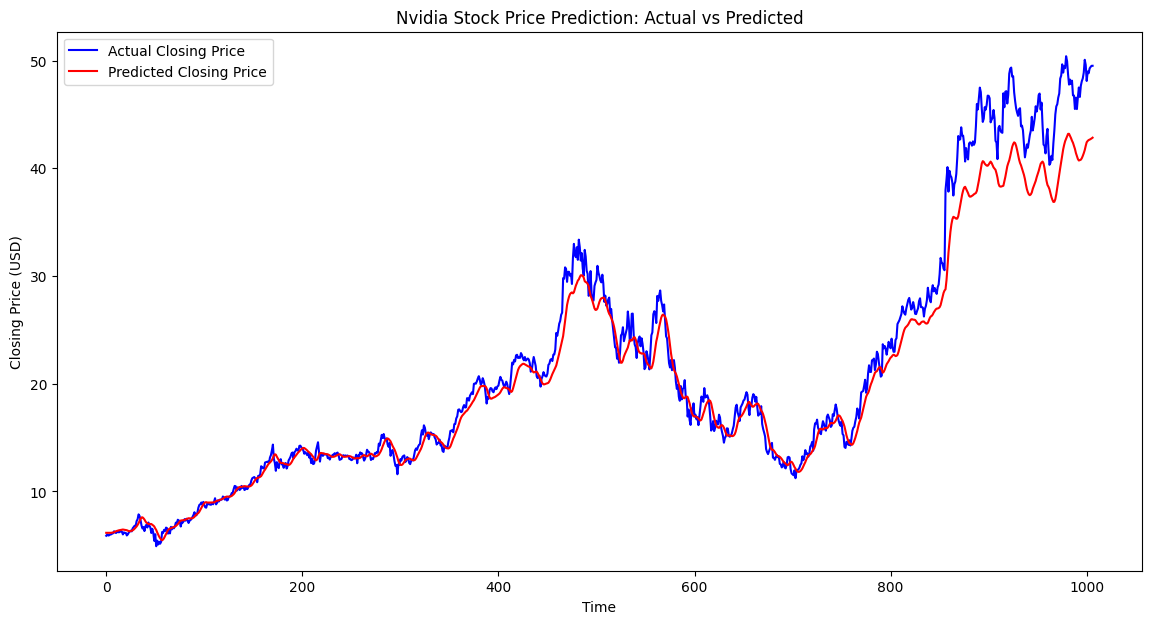

In [11]:
# Plot the actual closing prices and predicted closing prices

plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, color='blue', label='Actual Closing Price')
plt.plot(predictions, color='red', label='Predicted Closing Price')
plt.title('Nvidia Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


In [12]:
# Build an improved LSTM model with additional layers and hyperparameter adjustments
from tensorflow.keras.layers import GRU, Bidirectional

# Initialize the model
model = Sequential()

# Add a bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add another LSTM layer
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))  # Predicting the next closing price

# Compile the model with a smaller learning rate and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 29s 191ms/step - loss: 2.5763e-04 - val_loss: 8.9188e-04
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 23s 185ms/step - loss: 1.2159e-05 - val_loss: 6.5415e-04
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 184ms/step - loss: 1.2379e-05 - val_loss: 0.0010
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 40s 178ms/step - loss: 1.1556e-05 - val_loss: 0.0014
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 43s 197ms/step - loss: 1.5109e-05 - val_loss: 8.0435e-04
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 24s 198ms/step - loss: 1.1145e-05 - val_loss: 6.8590e-04
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 39s 183ms/step - loss: 9.7961e-06 - val_loss: 5.9816e-04
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 23s 186ms/step - loss: 1.1313e-05 - val_loss: 9.6616e-04
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 196ms/step - loss: 1.1203e-05 - val_loss: 8.7756e-04
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - loss: 1.1472e-05 - val_loss: 0.0012
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 39s 178ms/s

In [13]:
# Make predictions on the test set
predicted_stock_price = model.predict(X_test)

# Reverse scaling (if necessary) to get predictions in the original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE for the improved model
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, predicted_stock_price))
print(f"Root Mean Squared Error (RMSE): {rmse}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
Root Mean Squared Error (RMSE): 1.2309514573294795


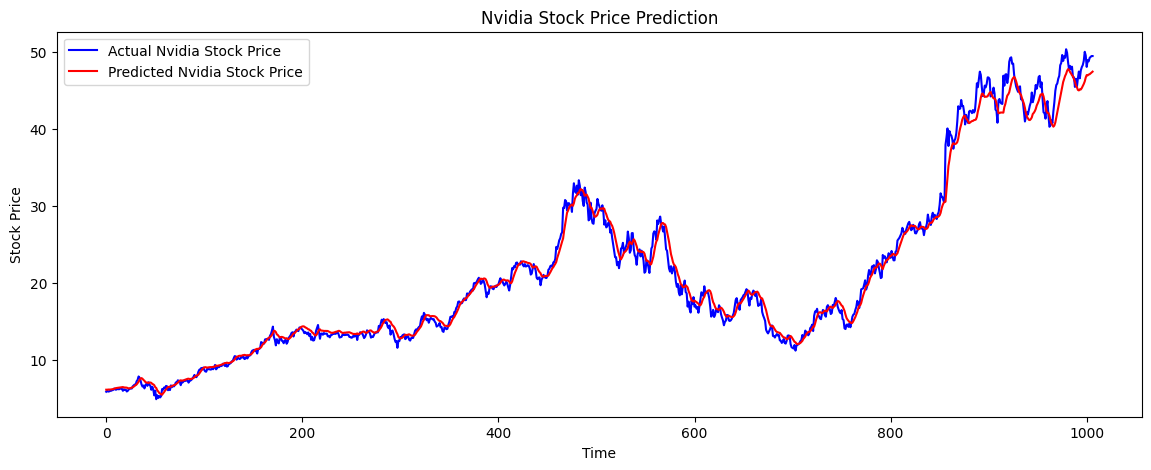

In [14]:
#Plot the actual vs predicted stock prices

plt.figure(figsize=(14,5))
plt.plot(y_test, color='blue', label='Actual Nvidia Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Nvidia Stock Price')
plt.title('Nvidia Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
